# CALIFORNIA HOUSING PRICES

#### A Data Science Project by Pulkit Mehta

## LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter("ignore")

## EDA

### DATA LOAD

In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.total_bedrooms.mean()

537.8705525375618

### DATA INFO

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### CHECK AND FILLING MISSING VALUES

In [8]:
def check_counts():
    plt.figure(figsize=(10,5))
    plt.title("Missing Values")
    for col in data.columns:
        print(data[col].isnull().value_counts())
        plt.barh(col,data[col].isnull().value_counts())
    plt.yticks(range(10),data.columns)
    plt.ylabel("Features")
    plt.xlabel("Samples Count")
    plt.xlim(20000,20700)
    plt.show()

False    20640
Name: longitude, dtype: int64
False    20640
Name: latitude, dtype: int64
False    20640
Name: housing_median_age, dtype: int64
False    20640
Name: total_rooms, dtype: int64
False    20433
True       207
Name: total_bedrooms, dtype: int64
False    20640
Name: population, dtype: int64
False    20640
Name: households, dtype: int64
False    20640
Name: median_income, dtype: int64
False    20640
Name: median_house_value, dtype: int64
False    20640
Name: ocean_proximity, dtype: int64


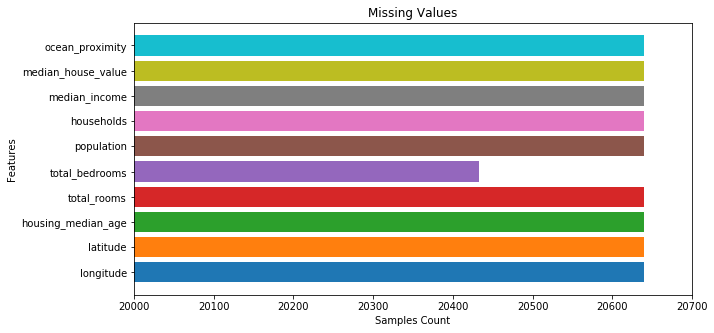

In [9]:
check_counts()

In [10]:
data.total_bedrooms=data.total_bedrooms.fillna(data.total_bedrooms.mean())

In [11]:
data.total_bedrooms.isnull().value_counts()

False    20640
Name: total_bedrooms, dtype: int64

False    20640
Name: longitude, dtype: int64
False    20640
Name: latitude, dtype: int64
False    20640
Name: housing_median_age, dtype: int64
False    20640
Name: total_rooms, dtype: int64
False    20640
Name: total_bedrooms, dtype: int64
False    20640
Name: population, dtype: int64
False    20640
Name: households, dtype: int64
False    20640
Name: median_income, dtype: int64
False    20640
Name: median_house_value, dtype: int64
False    20640
Name: ocean_proximity, dtype: int64


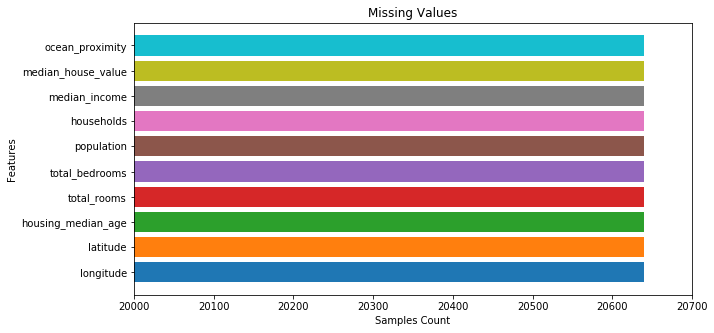

In [12]:
check_counts()

## DATA VISUALIZATIONS

### 1. COORELATED FEATURES

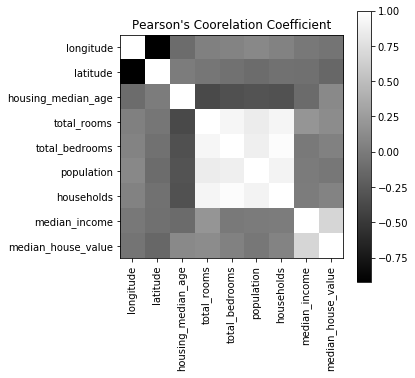

In [13]:
plt.figure(figsize=(5,5))
plt.title("Pearson's Coorelation Coefficient")
plt.imshow(data.corr().values, cmap='gray')
plt.colorbar()
plt.xticks((range(9)),data.columns,rotation=90)
plt.yticks((range(9)),data.columns)
plt.show()

### 2. OCEAN PROXIMITY PIE REPRESENTATION

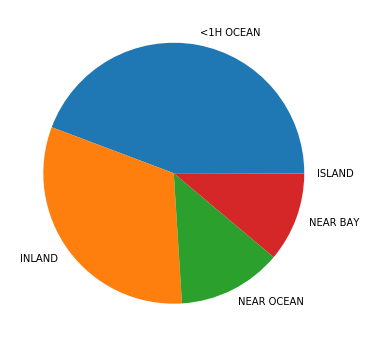

In [14]:
plt.figure(figsize=(6,6))
plt.pie(data.ocean_proximity.value_counts().values, labels=data.ocean_proximity.value_counts().keys())
plt.show()

### 3. DATA VISUALISATION ON LAT-LONG

In [15]:
def area_dist(var,density):
    plt.scatter(data.longitude.values,data.latitude.values,c=var,s=data.population.values/500,
                cmap=plt.get_cmap('jet'),alpha=density)
    plt.colorbar()

In [16]:
plot_vars=['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
def plot_dist(density):
    print("Density:",density)
    density=density
    plt.figure(figsize=(15,12))
    for col in plot_vars:
        plt.subplot(3,3,plot_vars.index(col)+1)
        plt.title(col)
        area_dist(data[col],density)
    plt.show()

Population on Latitude-Longitude
Density: 0.002


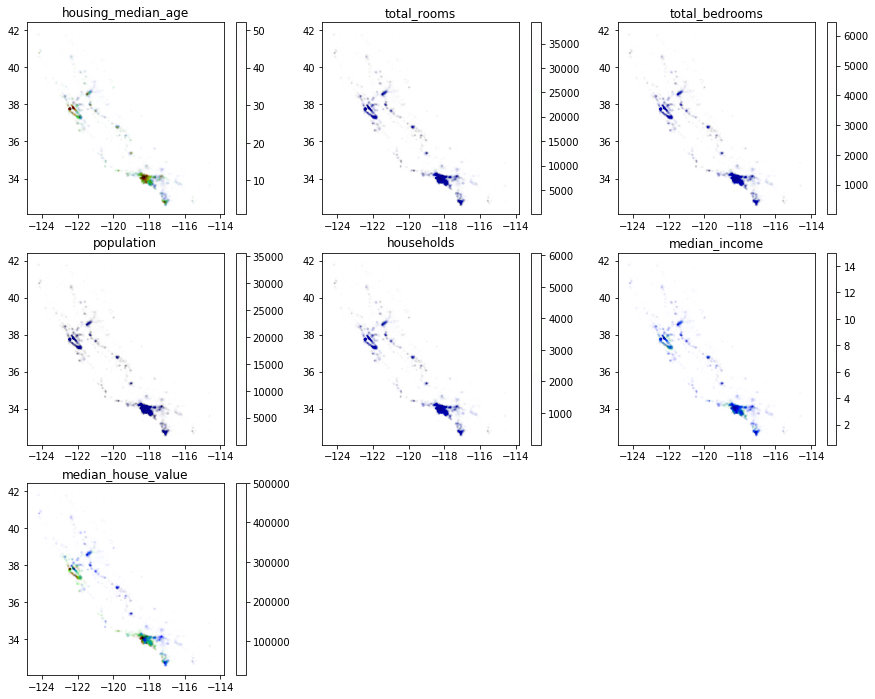

----------------------------------------------------------------------------------------------------
Population on Latitude-Longitude
Density: 0.004


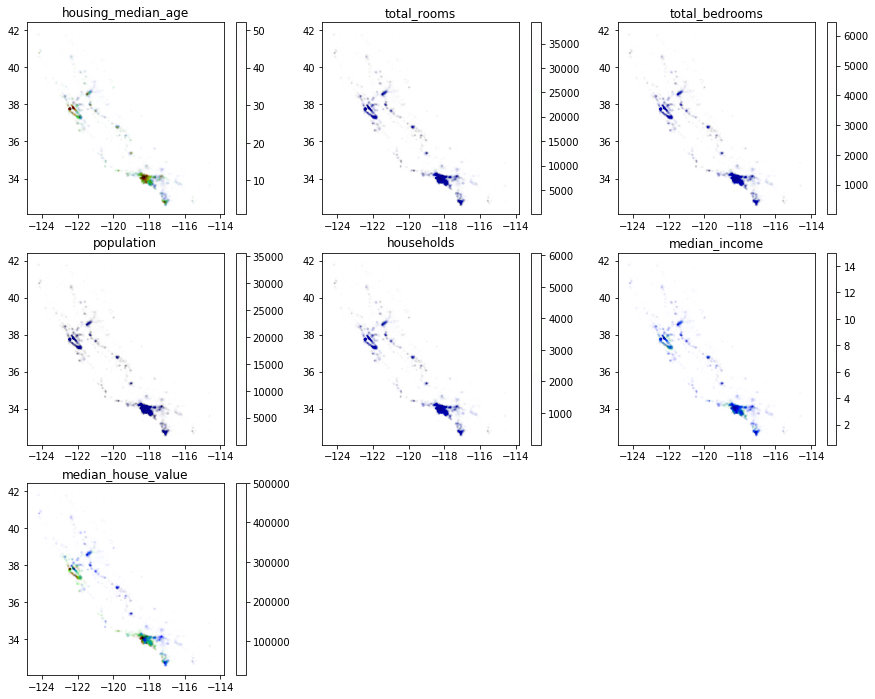

----------------------------------------------------------------------------------------------------
Population on Latitude-Longitude
Density: 0.006


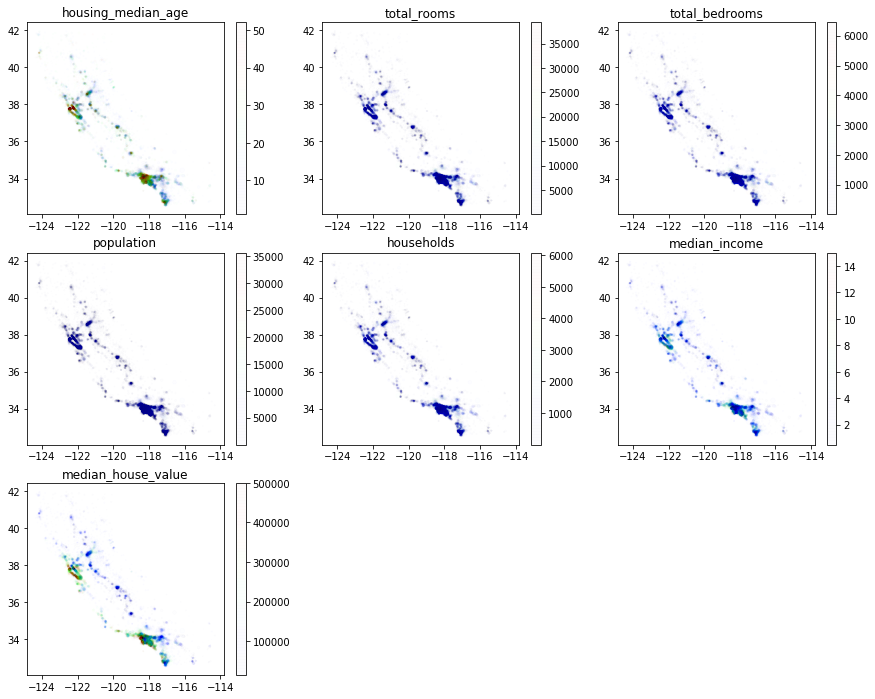

----------------------------------------------------------------------------------------------------
Population on Latitude-Longitude
Density: 0.008


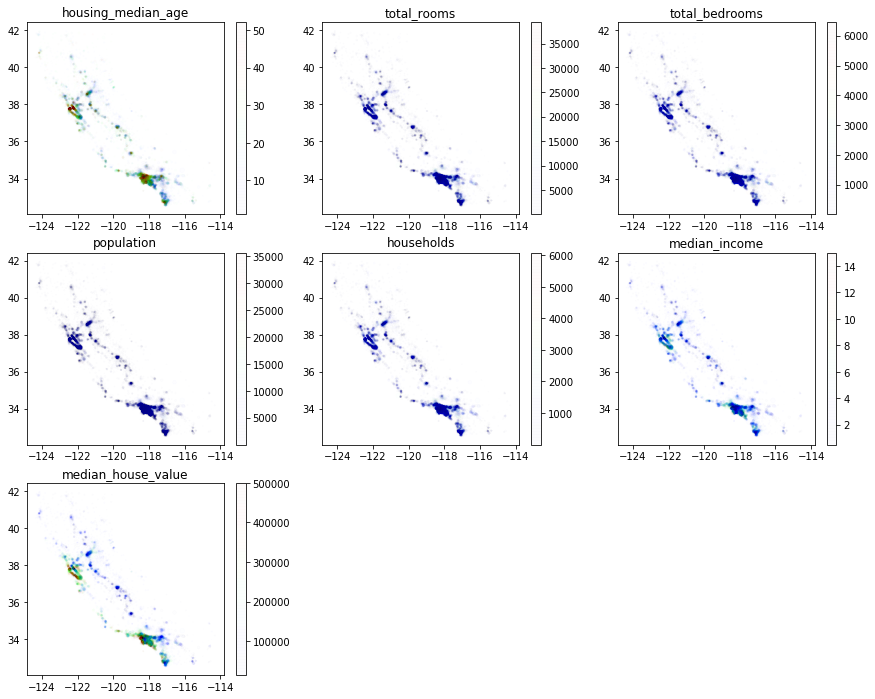

----------------------------------------------------------------------------------------------------
Population on Latitude-Longitude
Density: 0.01


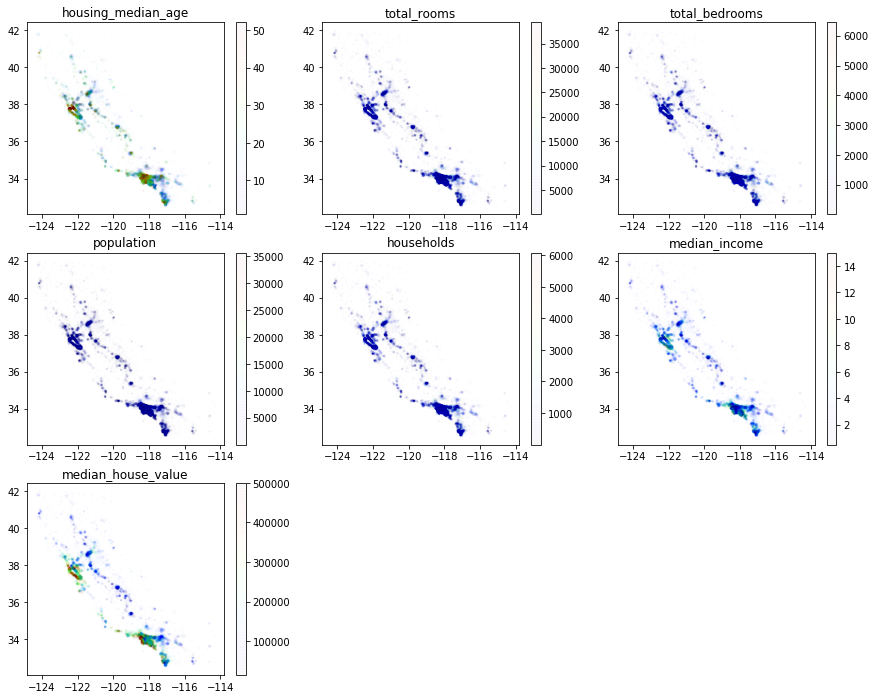

----------------------------------------------------------------------------------------------------
Population on Latitude-Longitude
Density: 0.1


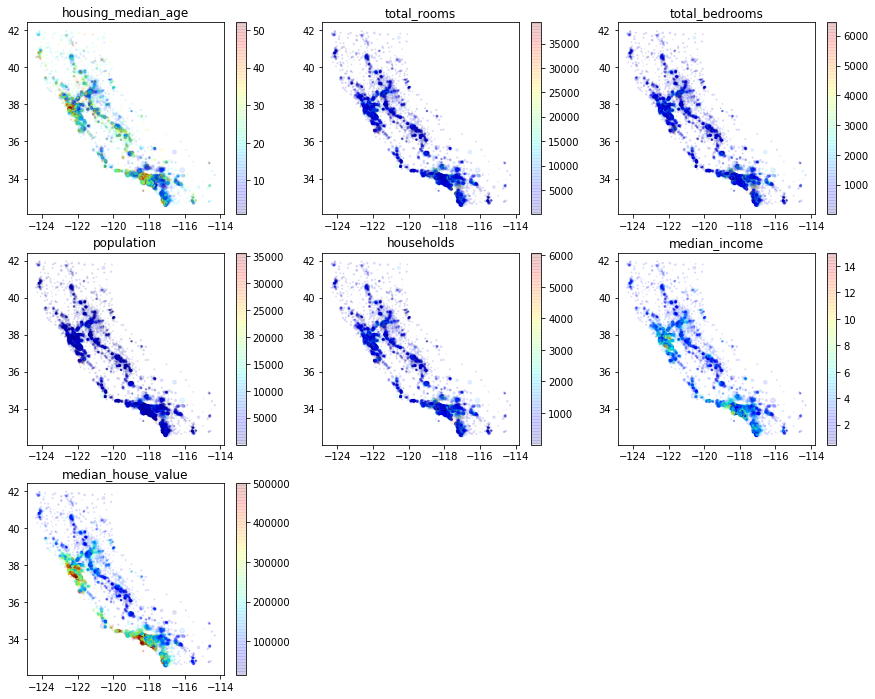

----------------------------------------------------------------------------------------------------
Population on Latitude-Longitude
Density: 0.5


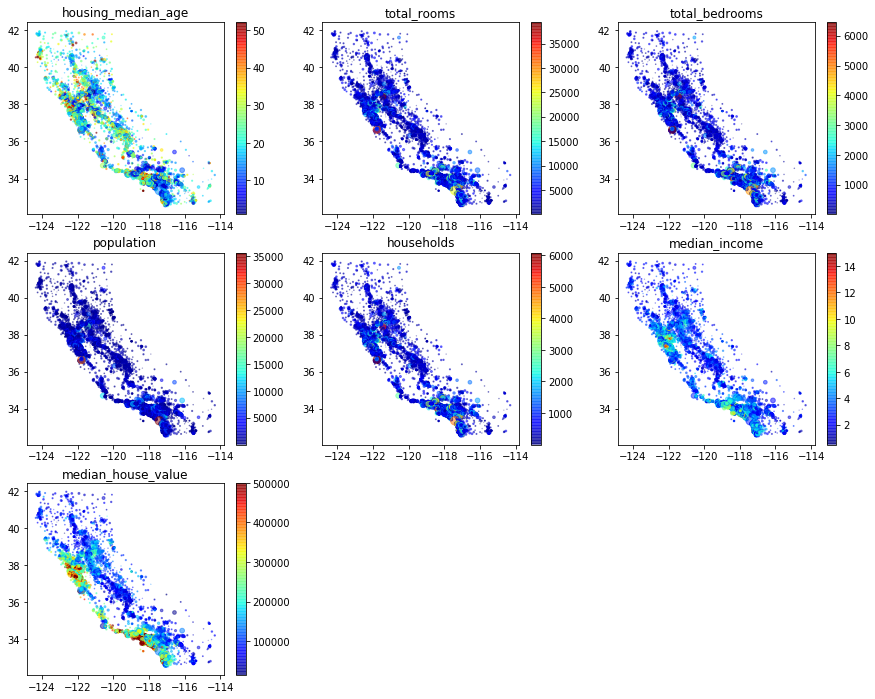

----------------------------------------------------------------------------------------------------
Population on Latitude-Longitude
Density: 1.0


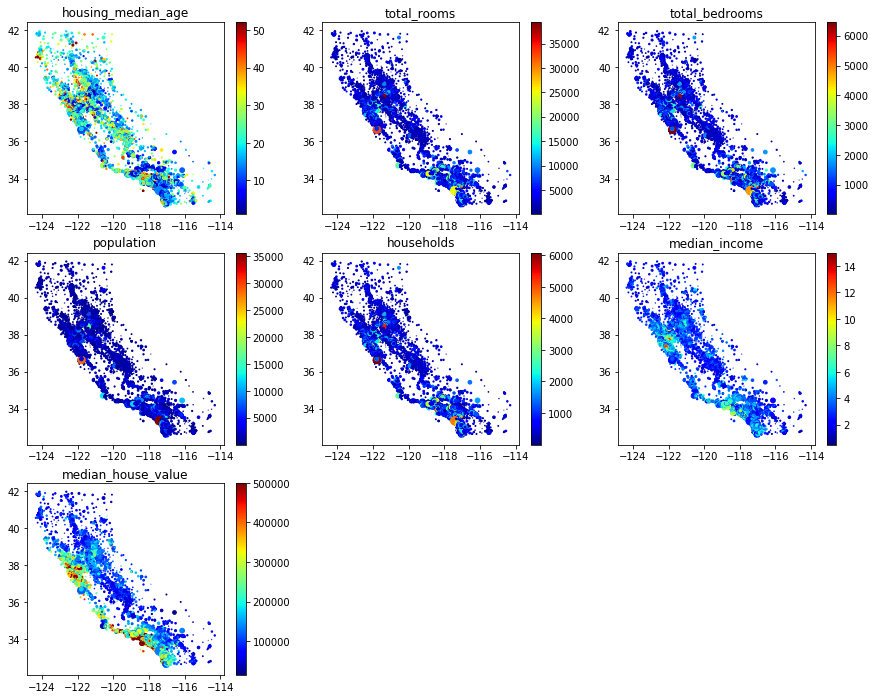

----------------------------------------------------------------------------------------------------


In [17]:
for d in [0.002,0.004,0.006,0.008,0.01,0.1,0.5,1.0]:
    print("Population on Latitude-Longitude")
    plot_dist(d)
    print("----------------------------------------------------------------------------------------------------")

### 4. HISTOGRAMS

In [18]:
data.columns[2:-2]

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income'],
      dtype='object')

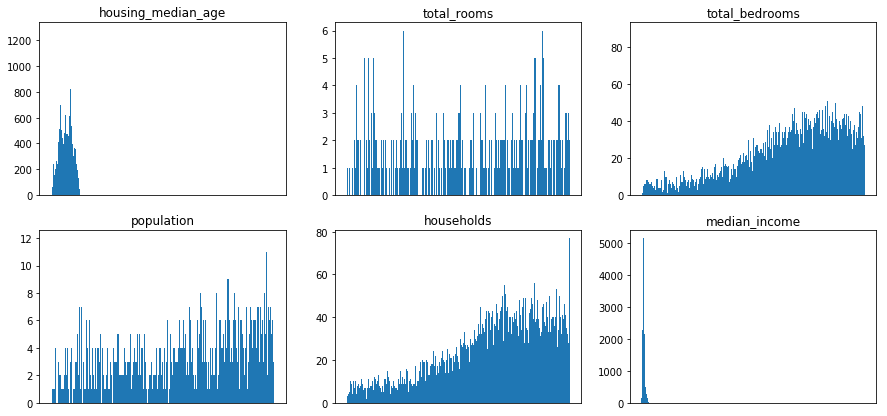

In [19]:
bins=400
plt.figure(figsize=(15,7))
for plot in range(1,7):
    plt.subplot(2,3,plot)
    plt.hist(data[(data.columns[2:-2].values)[plot-1]], bins=range(bins))
    plt.xticks(())
    plt.title((data.columns[2:-2].values)[plot-1])
plt.show()

### 5. MEDIAN HOUSE VALUE DISTRIBUTIONS

Median House Value Distribution:


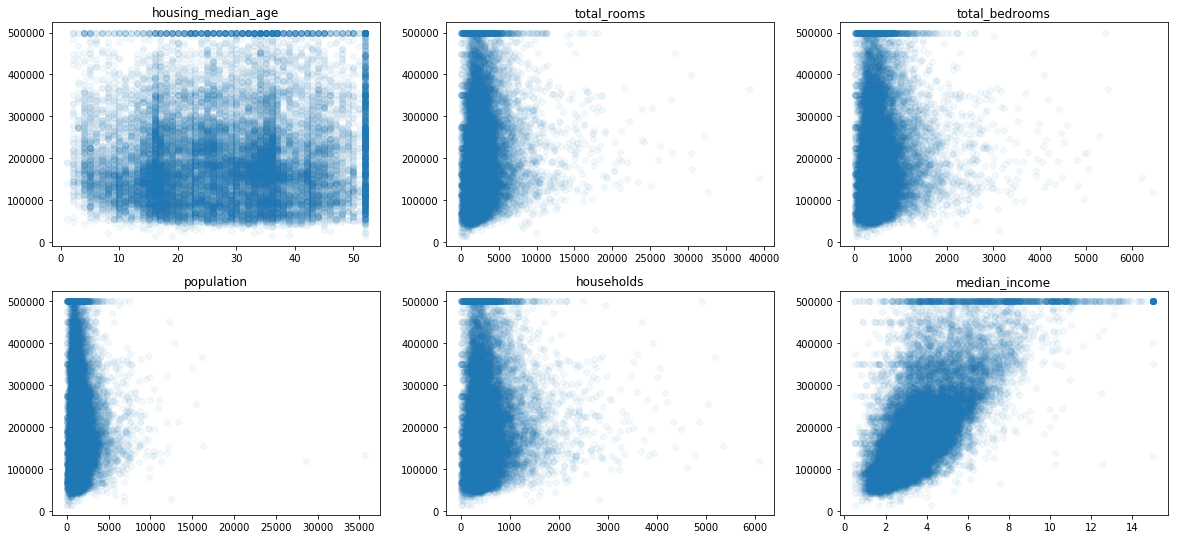

In [20]:
print("Median House Value Distribution:")
plt.figure(figsize=(20,14))
for col in plot_vars[:-1]:
    plt.subplot(3,3,(plot_vars.index(col))+1)
    plt.title(col)
    plt.scatter(data[col].values, data.median_house_value.values, alpha=0.05)
plt.show()    

### 6. INTER-FEATURES PLOTS ( HEATMAPPED over MEDIAN HOUSE VALUE )

In [21]:
plot_vars[:-1]

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

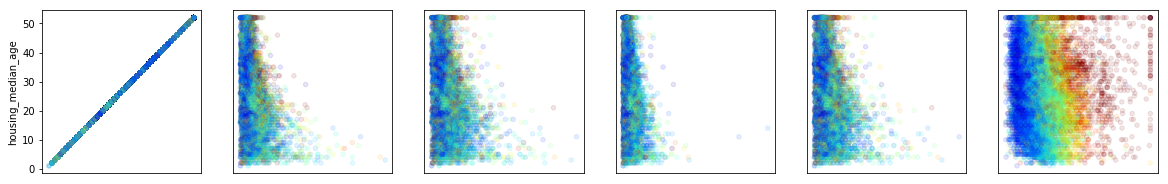

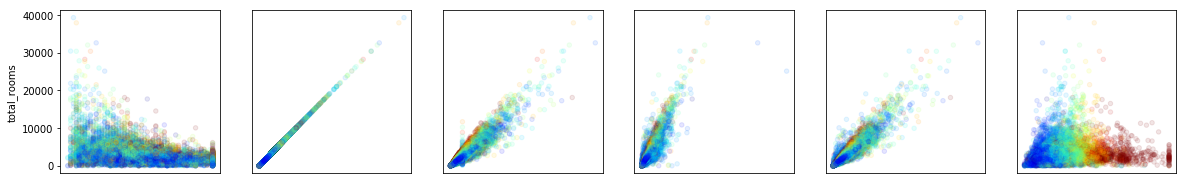

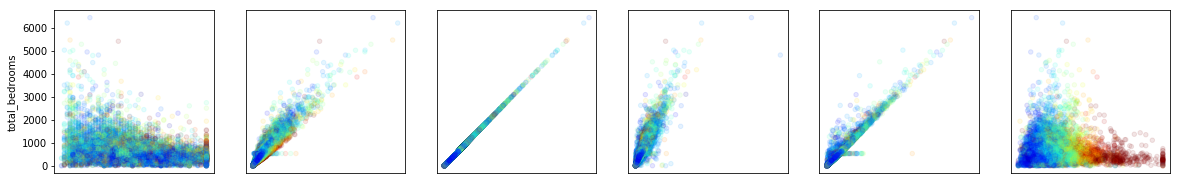

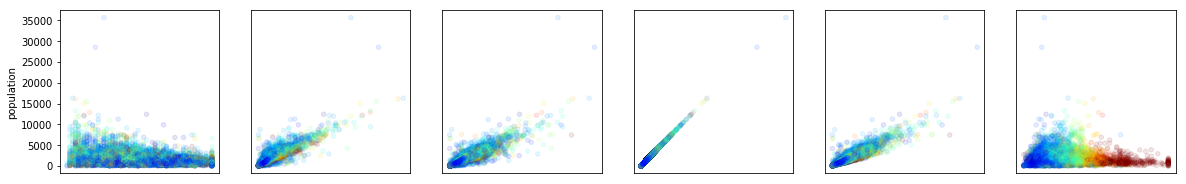

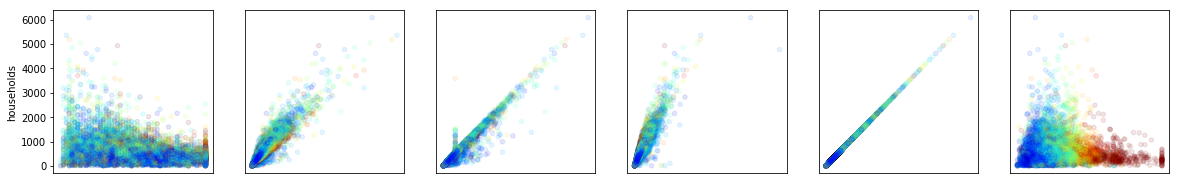

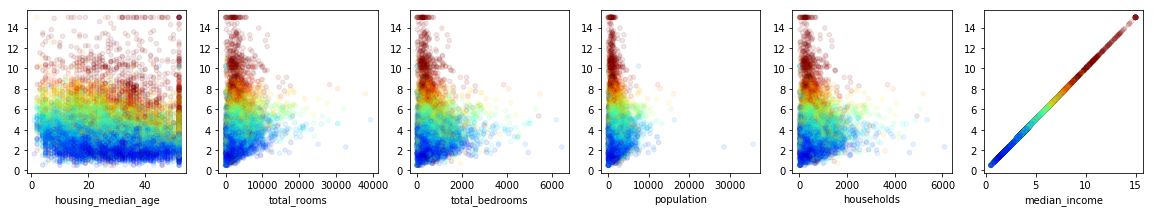

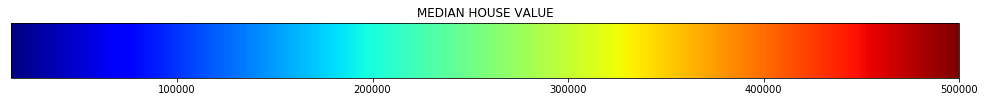

In [22]:
for col in plot_vars[:-1]:
    plt.figure(figsize=(20,3))
    plt.ylabel(col)
    for col1 in plot_vars[:-1]:
        plt.subplot(1,6,(plot_vars.index(col1))+1)
        plt.scatter(data[col1].values,data[col].values,
                    s=20,cmap=plt.get_cmap('jet'),c=data.median_house_value.values, alpha=0.1)
        if (plot_vars.index(col1))%6==0 and (plot_vars.index(col))!=5:
            plt.ylabel(col)
            plt.xticks(())
        elif (plot_vars.index(col))==5:
            plt.xlabel(col1)
        else:
            plt.xticks(())
            plt.yticks(())
    plt.show()
norm = mpl.colors.Normalize(vmin=data.median_house_value.min(), vmax=data.median_house_value.max())
fig, ax = plt.subplots(figsize=(17, 2))
plt.title("MEDIAN HOUSE VALUE")
fig.subplots_adjust(bottom=0.5)
cb1 = mpl.colorbar.ColorbarBase(ax,cmap=plt.get_cmap('jet'),
                                norm=norm,
                                orientation='horizontal')
plt.show()

## DATA PREPRATION

In [23]:
data_dummies=pd.get_dummies(data)

In [24]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
longitude                     20640 non-null float64
latitude                      20640 non-null float64
housing_median_age            20640 non-null float64
total_rooms                   20640 non-null float64
total_bedrooms                20640 non-null float64
population                    20640 non-null float64
households                    20640 non-null float64
median_income                 20640 non-null float64
median_house_value            20640 non-null float64
ocean_proximity_<1H OCEAN     20640 non-null uint8
ocean_proximity_INLAND        20640 non-null uint8
ocean_proximity_ISLAND        20640 non-null uint8
ocean_proximity_NEAR BAY      20640 non-null uint8
ocean_proximity_NEAR OCEAN    20640 non-null uint8
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


In [25]:
X=data_dummies.drop(columns='median_house_value').values

In [26]:
y=data_dummies['median_house_value'].values

In [27]:
X.shape, y.shape

((20640, 13), (20640,))

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=4)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15480, 13), (15480,), (5160, 13), (5160,))

## MODELS SELECTION

##### LIBRARIES

In [31]:
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

##### PARAMETER GRIDS

In [32]:
param_grid_ridge= {
    'alpha': [0.001,0.01,0.1,1.0,10.0,100.0,1000]
}
param_grid_lasso= {
    'alpha': [0.001,0.01,0.1,1.0,10.0,100.0,1000]
}
param_grid_rfr={
    'n_estimators':[100]
}
param_grid_dtr={
}

In [33]:
lr=LinearRegression()
grid_ridge= GridSearchCV(Ridge(), param_grid=param_grid_ridge,cv=5,n_jobs=-1)
grid_lasso= GridSearchCV(Lasso(), param_grid=param_grid_lasso,cv=5,n_jobs=-1)
grid_rfr=GridSearchCV(RandomForestRegressor(), param_grid=param_grid_rfr, cv=2, n_jobs=-1)
grid_dtr=GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid_dtr, cv=2, n_jobs=-1)

### UNIVERSAL MODEL SELECTION FUNCTION

In [34]:
def select_model(a,b,c,d):
    models=[
        'Linear Regression',
        'Ridge Regression',
        'Lasso Regression',
        'Decision Tree Regression',
        'Random Forest Regression'
    ]
    lr.fit(a,b)
    grid_ridge.fit(a,b)
    grid_lasso.fit(a,b)
    grid_dtr.fit(a,b)
    grid_rfr.fit(a,b)
    te=[
        lr.score(c,d),
        (grid_ridge.best_estimator_.fit(a,b)).score(c,d),
        (grid_lasso.best_estimator_.fit(a,b)).score(c,d),
        (grid_dtr.best_estimator_.fit(a,b)).score(c,d),
        (grid_rfr.best_estimator_.fit(a,b)).score(c,d),
    ]
    tr=[
        lr.score(a,b),
        (grid_ridge.best_estimator_.fit(a,b)).score(a,b),
        (grid_lasso.best_estimator_.fit(a,b)).score(a,b),
        (grid_dtr.best_estimator_.fit(a,b)).score(a,b),
        (grid_rfr.best_estimator_.fit(a,b)).score(a,b),
    ]
    cv=[
        0,
        grid_ridge.best_score_,
        grid_lasso.best_score_,
        grid_dtr.best_score_,
        grid_rfr.best_score_,
    ]
    print(
         "\n================================================================================="
         "\nLinear Regression Test Score:", te[0],
         "\nLinear Regression Train Score:", tr[0],
         "\n\nRidge CV Score:", cv[1],
         "\nRidge Regression Test Score:", te[1],
         "\nRidge Regression Train Score:", tr[1],
         "\n\nLasso CV Score:", cv[2],
         "\nLasso Regression Test Score:", te[2],
         "\nLasso Regression Train Score:", tr[2],
         "\n\nDescision Tree Regression CV Score:", cv[3],
         "\nDescision Tree Regression Test Score:", te[3],
         "\nDescision Tree Regression Train Score:", tr[3],
         "\n\nRandom Forest Regression CV Score:", cv[4],
         "\nRandom Forest Regression Test Score:", te[4],
         "\nRandom Forest Regression Train Score:", tr[4],
         "\n\n\n BEST PARAMETERS USED:",
         "\n\nRidge:\n",grid_ridge.best_estimator_,
         "\n\nLasso:\n",grid_lasso.best_estimator_,
         "\n\nDescision Tree:\n",grid_dtr.best_estimator_,
         "\n\nRandom Forest:\n",grid_rfr.best_estimator_,
         "\n=================================================================================\n"
    )
    plt.figure(figsize=(20,1))
    plt.title("RANDOM FOREST REGRESSOR FEATURE IMPORTANCES")
    plt.imshow((grid_rfr.best_estimator_).feature_importances_.reshape(1,-1))
    plt.colorbar()
    plt.xticks((range(a.shape[1])))
    plt.yticks(())
    plt.xlabel("Feature Number")
    plt.show()
    
    plt.figure()
    plt.title("COMPARISON OF MODELS")
    plt.plot(cv)
    plt.plot(te)
    plt.plot(tr)
    plt.xticks((range(5)), models, rotation=90)
    plt.xlabel("Models")
    plt.ylabel("Accuracy Score")
    plt.show()


Linear Regression Test Score: 0.6285852376391966 
Linear Regression Train Score: 0.6507474976953389 

Ridge CV Score: 0.6485428497794921 
Ridge Regression Test Score: 0.6285848387687865 
Ridge Regression Train Score: 0.6507473345566142 

Lasso CV Score: 0.6485420153767804 
Lasso Regression Test Score: 0.6285844879316485 
Lasso Regression Train Score: 0.6507472636660994 

Descision Tree Regression CV Score: 0.6209151307001693 
Descision Tree Regression Test Score: 0.6338757566556829 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.8012983280050056 
Random Forest Regression Test Score: 0.8205594909365219 
Random Forest Regression Train Score: 0.9748372410012166 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, ra

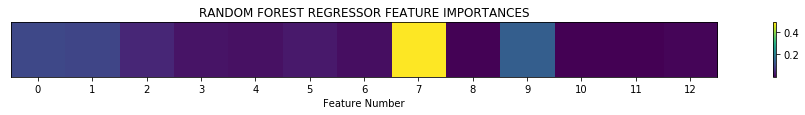

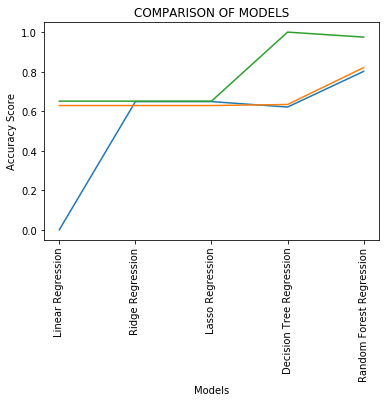

In [35]:
select_model(X_train,y_train,X_test,y_test)

### SCALING

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [37]:
min_max= MinMaxScaler()
std = StandardScaler()

In [38]:
X_train_min_max= min_max.fit_transform(X_train)
X_test_min_max= min_max.transform(X_test)
X_train_std= std.fit_transform(X_train)
X_test_std= std.transform(X_test)

#### MIN MAX


Linear Regression Test Score: 0.6285852376392 
Linear Regression Train Score: 0.650747497695339 

Ridge CV Score: 0.6487687728764551 
Ridge Regression Test Score: 0.6289224570975358 
Ridge Regression Train Score: 0.6506997599094235 

Lasso CV Score: 0.6485602936079058 
Lasso Regression Test Score: 0.6286629357886324 
Lasso Regression Train Score: 0.6507456437311532 

Descision Tree Regression CV Score: 0.6235562964513126 
Descision Tree Regression Test Score: 0.6336578798743122 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.8010774920169474 
Random Forest Regression Test Score: 0.8186593252148552 
Random Forest Regression Train Score: 0.9754610954751917 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random

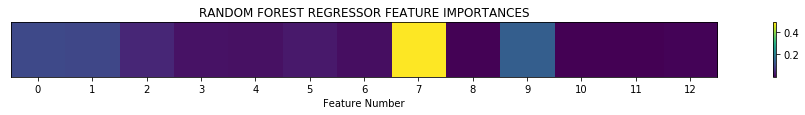

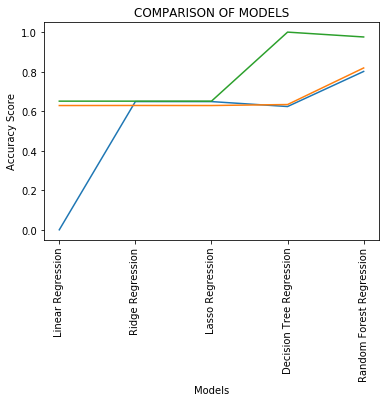

In [39]:
select_model(X_train_min_max,y_train,X_test_min_max, y_test)

#### STANDARD


Linear Regression Test Score: 0.6285852376391998 
Linear Regression Train Score: 0.650747497695339 

Ridge CV Score: 0.6485995438235158 
Ridge Regression Test Score: 0.6287297455478296 
Ridge Regression Train Score: 0.6507398011263401 

Lasso CV Score: 0.6485502348983192 
Lasso Regression Test Score: 0.6289658182053923 
Lasso Regression Train Score: 0.6506625714703185 

Descision Tree Regression CV Score: 0.6266299526886976 
Descision Tree Regression Test Score: 0.6187747196536747 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.8005283915125816 
Random Forest Regression Test Score: 0.8181321781367378 
Random Forest Regression Train Score: 0.9753223744306578 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, 

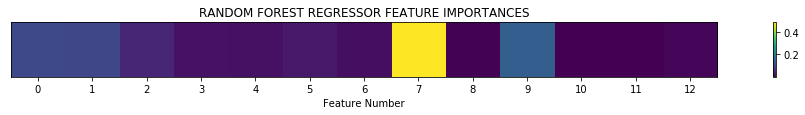

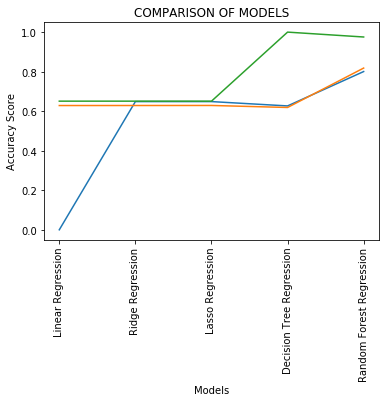

In [40]:
select_model(X_train_std,y_train,X_test_std, y_test)

### PCA

In [41]:
from sklearn.decomposition import PCA



Components: 2

Linear Regression Test Score: 0.09365407312804952 
Linear Regression Train Score: 0.09108290271753948 

Ridge CV Score: 0.08946815301105958 
Ridge Regression Test Score: 0.09365407309237428 
Ridge Regression Train Score: 0.09108290271753527 

Lasso CV Score: 0.08946835323768684 
Lasso Regression Test Score: 0.09365404889594608 
Lasso Regression Train Score: 0.09108290244383421 

Descision Tree Regression CV Score: -0.5606472780157603 
Descision Tree Regression Test Score: -0.48963290400021253 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.1049045904784493 
Random Forest Regression Test Score: 0.12193729230930861 
Random Forest Regression Train Score: 0.8766660993778383 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positi

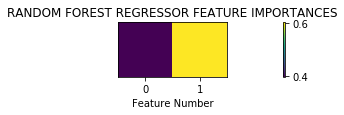

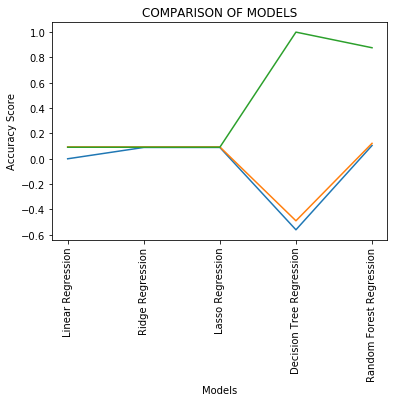



Components: 3

Linear Regression Test Score: 0.09495554596732869 
Linear Regression Train Score: 0.09338537708993744 

Ridge CV Score: 0.09128465597014761 
Ridge Regression Test Score: 0.0949555491694476 
Ridge Regression Train Score: 0.09338537708992199 

Lasso CV Score: 0.09128465333531527 
Lasso Regression Test Score: 0.09495554596875244 
Lasso Regression Train Score: 0.09338537708993744 

Descision Tree Regression CV Score: -0.3713145803281776 
Descision Tree Regression Test Score: -0.31835181445528327 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.2583943202894463 
Random Forest Regression Test Score: 0.2671689498258898 
Random Forest Regression Train Score: 0.8977682143488087 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positiv

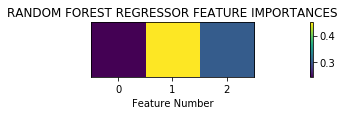

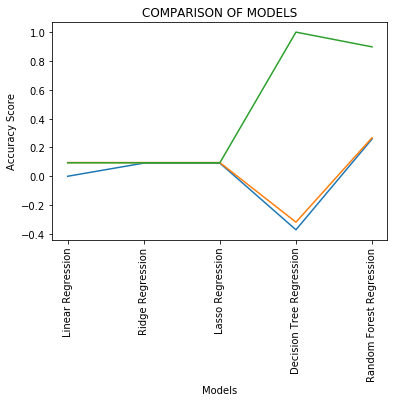



Components: 4

Linear Regression Test Score: 0.12691561629993198 
Linear Regression Train Score: 0.12666711306502754 

Ridge CV Score: 0.122507629802198 
Ridge Regression Test Score: 0.12691559555604348 
Ridge Regression Train Score: 0.1266671130538456 

Lasso CV Score: 0.12250946648186048 
Lasso Regression Test Score: 0.1269149124974518 
Lasso Regression Train Score: 0.1266670890617526 

Descision Tree Regression CV Score: -0.26137819720461 
Descision Tree Regression Test Score: -0.3151267520570875 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.3283444639928056 
Random Forest Regression Test Score: 0.3296319949083457 
Random Forest Regression Train Score: 0.9078335878412757 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False,

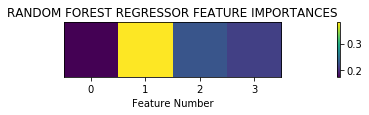

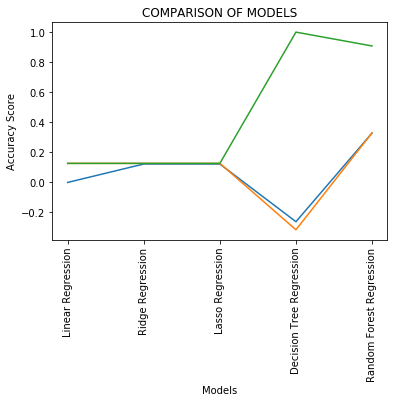



Components: 5

Linear Regression Test Score: 0.14938205601500798 
Linear Regression Train Score: 0.15498296451224047 

Ridge CV Score: 0.15096712580473484 
Ridge Regression Test Score: 0.1493846677974936 
Ridge Regression Train Score: 0.1549829582768163 

Lasso CV Score: 0.15096712457449896 
Lasso Regression Test Score: 0.14938205603956245 
Lasso Regression Train Score: 0.15498296451224047 

Descision Tree Regression CV Score: -0.14287894115659705 
Descision Tree Regression Test Score: -0.12039984107792523 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.3930119612688132 
Random Forest Regression Test Score: 0.3985163601506294 
Random Forest Regression Train Score: 0.9181100908683213 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positiv

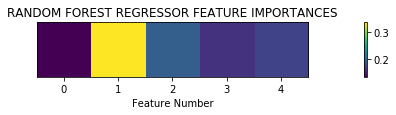

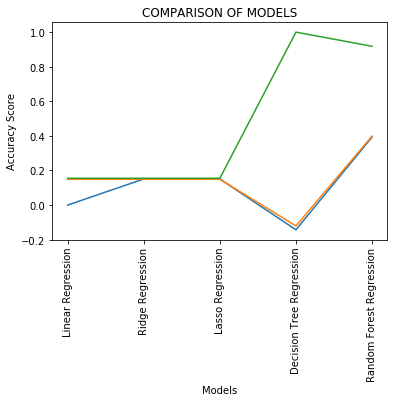



Components: 6

Linear Regression Test Score: 0.17361853165876406 
Linear Regression Train Score: 0.17592236281342533 

Ridge CV Score: 0.17074545674341743 
Ridge Regression Test Score: 0.1735991312906192 
Ridge Regression Train Score: 0.17592104992257127 

Lasso CV Score: 0.1707461534258618 
Lasso Regression Test Score: 0.17357843531861072 
Lasso Regression Train Score: 0.17591259141704785 

Descision Tree Regression CV Score: 0.10164565600902283 
Descision Tree Regression Test Score: 0.08878616260239558 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.5347275867440925 
Random Forest Regression Test Score: 0.54570122423686 
Random Forest Regression Train Score: 0.9383637490433082 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=Fal

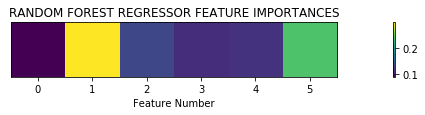

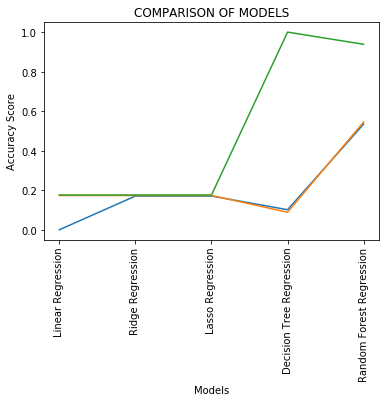



Components: 7

Linear Regression Test Score: 0.5735842550529568 
Linear Regression Train Score: 0.5992625269949757 

Ridge CV Score: 0.5971557968385307 
Ridge Regression Test Score: 0.5735876394820036 
Ridge Regression Train Score: 0.5992624991290044 

Lasso CV Score: 0.5971559354157078 
Lasso Regression Test Score: 0.5735943862700004 
Lasso Regression Train Score: 0.5992621333104703 

Descision Tree Regression CV Score: 0.406164291004788 
Descision Tree Regression Test Score: 0.426353959601636 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.711503868766797 
Random Forest Regression Test Score: 0.7153899232422769 
Random Forest Regression Train Score: 0.961390904134224 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, preco

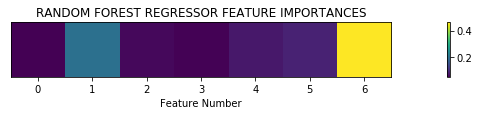

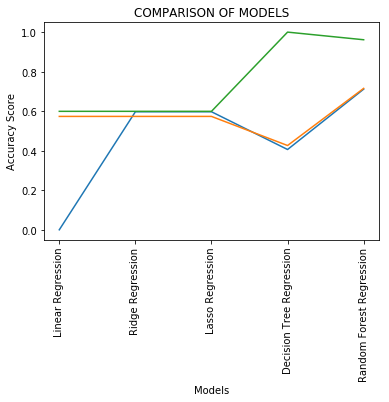



Components: 8

Linear Regression Test Score: 0.6247062506493437 
Linear Regression Train Score: 0.6468952677236497 

Ridge CV Score: 0.6447707042104689 
Ridge Regression Test Score: 0.6247064159420825 
Ridge Regression Train Score: 0.6468952661920093 

Lasso CV Score: 0.6447707150472347 
Lasso Regression Test Score: 0.624706787378823 
Lasso Regression Train Score: 0.6468952450345142 

Descision Tree Regression CV Score: 0.49469203786064003 
Descision Tree Regression Test Score: 0.49279608203979 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.7497992118596561 
Random Forest Regression Test Score: 0.7544531334510073 
Random Forest Regression Train Score: 0.9672356109632062 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, preco

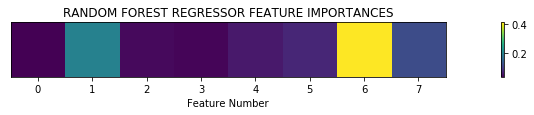

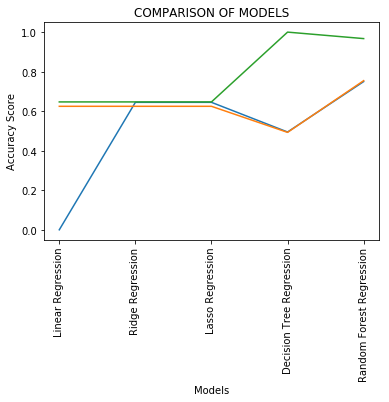



Components: 9

Linear Regression Test Score: 0.6285343286509856 
Linear Regression Train Score: 0.6500909432628564 

Ridge CV Score: 0.6479681619362733 
Ridge Regression Test Score: 0.6285344780102775 
Ridge Regression Train Score: 0.6500909414615766 

Lasso CV Score: 0.6479681431200839 
Lasso Regression Test Score: 0.6285343285746018 
Lasso Regression Train Score: 0.6500909432628559 

Descision Tree Regression CV Score: 0.5091765669859164 
Descision Tree Regression Test Score: 0.5227533708040644 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.7592225106071476 
Random Forest Regression Test Score: 0.7663361273226728 
Random Forest Regression Train Score: 0.9685997568202229 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, pr

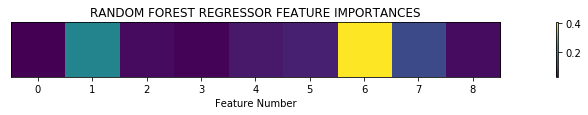

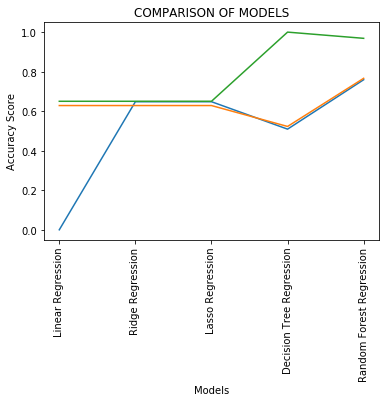



Components: 10

Linear Regression Test Score: 0.62850394134139 
Linear Regression Train Score: 0.6500912159563909 

Ridge CV Score: 0.647939172209163 
Ridge Regression Test Score: 0.6285054783241111 
Ridge Regression Train Score: 0.6500910363335906 

Lasso CV Score: 0.6479594726416008 
Lasso Regression Test Score: 0.6285207224353819 
Lasso Regression Train Score: 0.6500853152481829 

Descision Tree Regression CV Score: 0.5181842669819443 
Descision Tree Regression Test Score: 0.5153690665125219 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.7612301503686204 
Random Forest Regression Test Score: 0.7642565556956177 
Random Forest Regression Train Score: 0.9690403291561359 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, pre

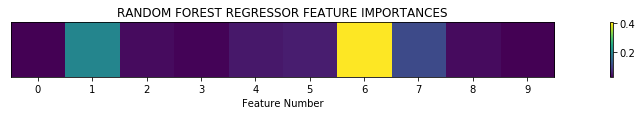

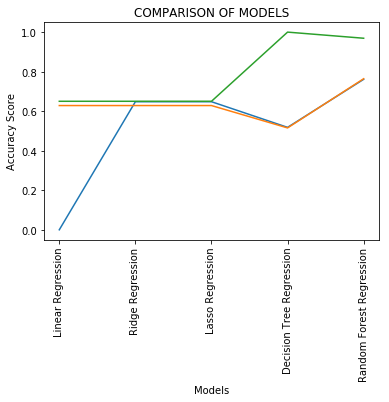

In [42]:
for n in range(2,11):
    print("\n\nComponents:",n)
    pca=PCA(n_components=n)
    X_train_pca=pca.fit_transform(X_train)
    X_test_pca=pca.transform(X_test)
    select_model(X_train_pca,y_train,X_test_pca,y_test)

In [43]:
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

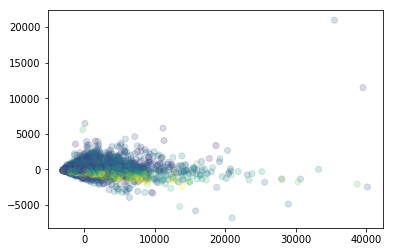

In [44]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train, alpha=0.2)

### POLYNOMIAL FEATURES

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
pf=PolynomialFeatures(degree=2)

In [47]:
X_train_poly= pf.fit_transform(X_train)
X_test_poly= pf.transform(X_test)


Linear Regression Test Score: 0.68783170776807 
Linear Regression Train Score: 0.7182431396891928 

Ridge CV Score: 0.6378525649442146 
Ridge Regression Test Score: 0.6877606744841716 
Ridge Regression Train Score: 0.7180915021769906 

Lasso CV Score: 0.644241129233054 
Lasso Regression Test Score: 0.6701807603714545 
Lasso Regression Train Score: 0.6974510865623134 

Descision Tree Regression CV Score: 0.5727659754557035 
Descision Tree Regression Test Score: 0.5815556356083702 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.7888768293565313 
Random Forest Regression Test Score: 0.8119842008914537 
Random Forest Regression Train Score: 0.9732810040326242 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, ra

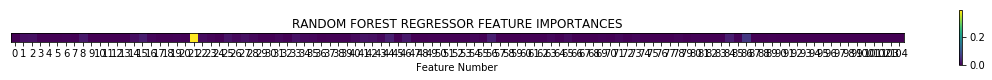

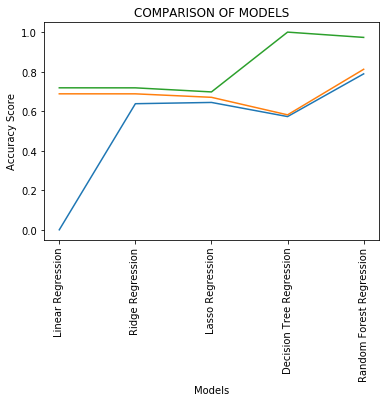

In [48]:
select_model(X_train_poly,y_train,X_test_poly,y_test)

#### POLYNOMIAL FEATURES WITH SCALING

In [49]:
X_train_poly_min_max= min_max.fit_transform(X_train_poly)
X_test_poly_min_max= min_max.transform(X_test_poly)


Linear Regression Test Score: 0.6878316808306729 
Linear Regression Train Score: 0.7182431477713154 

Ridge CV Score: 0.6927427083618544 
Ridge Regression Test Score: 0.6791061091693829 
Ridge Regression Train Score: 0.7070399652280258 

Lasso CV Score: 0.6852734233312834 
Lasso Regression Test Score: 0.663394347654029 
Lasso Regression Train Score: 0.6900297269297251 

Descision Tree Regression CV Score: 0.5756057811768366 
Descision Tree Regression Test Score: 0.583379180916188 
Descision Tree Regression Train Score: 1.0 

Random Forest Regression CV Score: 0.7876122871651469 
Random Forest Regression Test Score: 0.8105387125788657 
Random Forest Regression Train Score: 0.9737709144198211 


 BEST PARAMETERS USED: 

Ridge:
 Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

Lasso:
 Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, ra

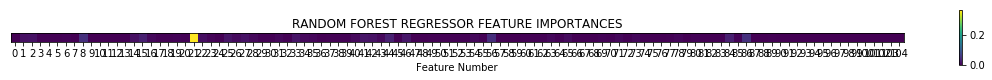

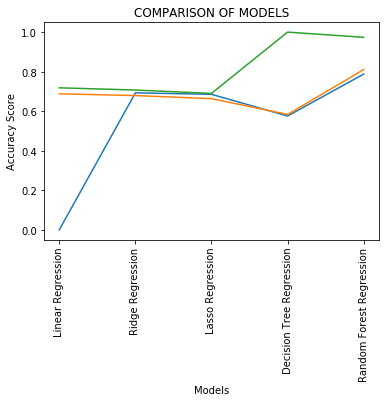

In [50]:
select_model(X_train_poly_min_max,y_train,X_test_poly_min_max,y_test)

##### END